In [1]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_excel('../all_data_for_10_days.xlsx')

In [38]:
df.head(10)

,ID #,Construction,Order Quantity,Unnamed: 3,Unnamed: 4,Shrin.%,B.L.(m),Rec.,Rec..1,TOTAL,Shrin.%.1,Grey(Inspected)Production,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Shrin.%.2,B/F,Remarks
0,NaN,NaN,F.F.,F.A,G.F.,NaN,NaN,B/L,B/L,Prodn.,NaN,Todays,Pre.,TOTAL,Rej.&,TOTAL,NaN,B/C,NaN
1,NaN,NaN,Yds,NaN,Yds,NaN,NaN,mtr,Yds,Yds,NaN,Del.,Del.,Del.,C.Pcs,Prodn.,NaN,D/C,NaN
2,13064-5,40x40/110x70,15136,7,16275.268817,10,16535.874195,3000,3280.8,2721,17.062911,NaN,NaN,NaN,NaN,NaN,NaN,B/F,NaN
3,13064-5(A),40x40/110x70,1000,11.1,1124.859393,12.5,1175.524498,1145,1252.172,746,40.42352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17930,19608.248,15894,18.942274,411,15972,16383,34,16417,16.275029,NaN,NaN
5,13068-2,40x40/120x70,1260,11.6,1425.339367,12.7,1492.950934,2600,2843.36,2332,17.984357,NaN,NaN,NaN,NaN,NaN,NaN,B/F,NaN
6,13073-3,NaN,2870,7.1,3089.34338,11.2,3181.227407,1600,1749.76,317,81.88323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13074-1,NaN,1120,11,1258.426966,12.9,1321.147659,1350,1476.36,541,63.355821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5550,6069.48,3190,47.441955,416,2004,2420,70,2490,58.975069,NaN,NaN
9,13070-1,40x40/130x80,4200,8,4565.217391,14,4854.052959,2375,2597.3,721,72.240403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#beam_length = Grey_fabric*100(100-shrinkage)/1.0985

In [32]:
data = df[['Construction', 'Order Quantity','Shrin.%.1', 'Unnamed: 4', 'Unnamed: 13', 'Unnamed: 14']]
data.head()

,Construction,Order Quantity,Shrin.%.1,Unnamed: 4,Unnamed: 13,Unnamed: 14
0,NaN,F.F.,NaN,G.F.,TOTAL,Rej.&
1,NaN,Yds,NaN,Yds,Del.,C.Pcs
2,40x40/110x70,15136,17.062911,16275.268817,NaN,NaN
3,40x40/110x70,1000,40.42352,1124.859393,NaN,NaN
4,NaN,NaN,18.942274,NaN,16383,34


In [33]:
data = data.rename(columns={'Unnamed: 4': 'Required_Grey_Fabric','Shrin.%.1':'Allowance', 'Unnamed: 13':'Total_delivery', 'Unnamed: 14':'Rejection'}, )

In [34]:
d = data.head(20)

In [35]:
d

,Construction,Order Quantity,Allowance,Required_Grey_Fabric,Total_delivery,Rejection
0,NaN,F.F.,NaN,G.F.,TOTAL,Rej.&
1,NaN,Yds,NaN,Yds,Del.,C.Pcs
2,40x40/110x70,15136,17.062911,16275.268817,NaN,NaN
3,40x40/110x70,1000,40.42352,1124.859393,NaN,NaN
4,NaN,NaN,18.942274,NaN,16383,34
5,40x40/120x70,1260,17.984357,1425.339367,NaN,NaN
6,NaN,2870,81.88323,3089.34338,NaN,NaN
7,NaN,1120,63.355821,1258.426966,NaN,NaN
8,NaN,NaN,47.441955,NaN,2420,70
9,40x40/130x80,4200,72.240403,4565.217391,NaN,NaN


In [3]:
df['warp_count']=df['Construction'].apply(lambda x: int(x[:2]))

df['weft_count']= df['Construction'].apply(lambda x: int(x.split('/')[0][-2:].replace('0x', '40')))
# df['weft_count'].replace('', 40)

df['epi']= df['Construction'].apply(lambda x: int(x.split('/')[-1].split('x')[0]))

df['ppi']= df['Construction'].apply(lambda x: int(x.split('/')[-1].split('x')[1]))

In [4]:
df.head()

,Sl,ID No.,Construction,Count,Weft count,EPI,PPI,remark,F.Ord.(Yds),Delivery,...,Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%,Unnamed: 19,warp_count,weft_count,epi,ppi
0,1,12207-8,40+40/2/40/110x80,40,40,110,80,double beam,31300,6.000360,...,34668,301.0,34969.0,1671.0,8.665974,NaN,40,40,110,80
1,2,12213-14-3,40x40/110x90,40,40,110,90,normal,54600,6.998927,...,59019,505.0,59524.0,815.0,14.519973,NaN,40,40,110,90
2,3,12313-14-2,40x40/110x90,40,40,110,90,normal,64715,6.999971,...,70613,341.0,70954.0,1368.0,14.054488,NaN,40,40,110,90
3,4,12315-29-1,40x40/110x90,40,40,110,90,normal,25500,6.998796,...,27820,NaN,27820.0,401.0,14.011231,NaN,40,40,110,90
4,5,12317-2,50x50/140x70,50,50,140,70,normal,20700,8.000000,...,22631,369.0,23000.0,500.0,7.696047,NaN,50,50,140,70


In [5]:
df = df.drop(['Construction', 'Unnamed: 19', 'EPI', 'PPI', 'Count', 'Weft count'],axis=1)

In [6]:
df.head()

,Sl,ID No.,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%,warp_count,weft_count,epi,ppi
0,1,12207-8,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974,40,40,110,80
1,2,12213-14-3,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973,40,40,110,90
2,3,12313-14-2,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488,40,40,110,90
3,4,12315-29-1,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,NaN,27820.0,401.0,14.011231,40,40,110,90
4,5,12317-2,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047,50,50,140,70


In [11]:
df['ID No. '][0].split('-')[0]

'12207'

In [16]:
df.shape

(409, 18)

In [30]:
df['lot_no.']= df['ID No. '].apply(lambda x: int(x.split('-')[0].split('/')[0].split('+')[0]))

In [19]:
df.head()

,Sl,ID No.,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%,warp_count,weft_count,epi,ppi,lot_no.
0,1,12207-8,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974,40,40,110,80,12207
1,2,12213-14-3,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973,40,40,110,90,12213
2,3,12313-14-2,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488,40,40,110,90,12313
3,4,12315-29-1,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,NaN,27820.0,401.0,14.011231,40,40,110,90,12315
4,5,12317-2,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047,50,50,140,70,12317


In [32]:
data = df[['Sl', 'lot_no.','warp_count',
 'weft_count','epi','ppi','remark','F.Ord.(Yds)','Delivery','Req. Grey Qtv (Yds)','Shrin%','Req. Beam L(yds)',
 'Recv. Beam L(Yds)','Deliverd Yds',
 'Rej.Yds',
 'Total Prod Yds',
 'Short/Ex. Yds',
 'Total loss%']]

In [36]:
data['Rej.Yds'].fillna(0)

0      301.0
1      505.0
2      341.0
3        0.0
4      369.0
       ...  
404     74.0
405     16.0
406     38.0
407     49.0
408     19.0
Name: Rej.Yds, Length: 409, dtype: float64

In [34]:
data.select_dtypes('object')

,remark
0,double beam
1,normal
2,normal
3,normal
4,normal
...,...
404,normal
405,normal
406,normal
407,normal


In [40]:
data.loc[:,'Rej.Yds']= data['Rej.Yds'].fillna(0)

/home/toufique/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [41]:
data.isna().sum()

Sl                     0
lot_no.                0
warp_count             0
weft_count             0
epi                    0
ppi                    0
remark                 0
F.Ord.(Yds)            0
Delivery               0
Req. Grey Qtv (Yds)    0
Shrin%                 0
Req. Beam L(yds)       0
Recv. Beam L(Yds)      0
Deliverd Yds           0
Rej.Yds                0
Total Prod Yds         0
Short/Ex. Yds          0
Total loss%            0
dtype: int64

In [42]:
data.to_csv('textile_rejection_prediction.csv', index= False)

In [21]:
list(df.columns)

['Sl',
 'ID No. ',
 'remark',
 'F.Ord.(Yds)',
 'Delivery',
 'Req. Grey Qtv (Yds)',
 'Shrin%',
 'Req. Beam L(yds)',
 'Recv. Beam L(Yds)',
 'Deliverd Yds',
 'Rej.Yds',
 'Total Prod Yds',
 'Short/Ex. Yds',
 'Total loss%',
 'warp_count',
 'weft_count',
 'epi',
 'ppi',
 'lot_no.']

In [7]:
import re

In [40]:
''.join(re.findall(r'\d+',df['ID No. '][0]))

'122078'

In [43]:
# c= '-', '/'
df['Fabirc_id']=df['ID No. '].apply(lambda x: int(''.join(re.findall(r'\d+', x))))

In [44]:
df= df.drop(['ID No. '], axis=1)

In [45]:
df.head()

,Sl,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%,warp_count,weft_count,epi,ppi,Fabirc_id
0,1,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974,40,40,110,80,122078
1,2,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973,40,40,110,90,12213143
2,3,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488,40,40,110,90,12313142
3,4,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,NaN,27820.0,401.0,14.011231,40,40,110,90,12315291
4,5,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047,50,50,140,70,123172


In [49]:
data= df[[ 'Fabirc_id','warp_count','weft_count','epi','ppi','remark',
    'F.Ord.(Yds)','Delivery','Req. Grey Qtv (Yds)','Shrin%','Req. Beam L(yds)',
    'Recv. Beam L(Yds)','Deliverd Yds','Rej.Yds','Total Prod Yds','Short/Ex. Yds','Total loss%',
]]

In [50]:
data.head()

,Fabirc_id,warp_count,weft_count,epi,ppi,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%
0,122078,40,40,110,80,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974
1,12213143,40,40,110,90,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973
2,12313142,40,40,110,90,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488
3,12315291,40,40,110,90,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,NaN,27820.0,401.0,14.011231
4,123172,50,50,140,70,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047


In [53]:
data['Rej.Yds'].fillna(0)

0      301.0
1      505.0
2      341.0
3        0.0
4      369.0
       ...  
404     74.0
405     16.0
406     38.0
407     49.0
408     19.0
Name: Rej.Yds, Length: 409, dtype: float64

In [56]:
data.to_csv('clean_data_textile_waste.csv', index= False)

In [207]:
X=df.copy()
y = X.pop('Total loss%')

In [208]:
for i in X['EPI']:
    if i.isdigit():
        pass
    else:
        print(i)
    

30x


In [209]:
X['EPI'] = X['EPI'].apply(lambda x: int(x.replace('30x', '30')))

In [210]:
X.select_dtypes('object').head()

,ID No.,remark
0,12207-8,double beam
1,12213-14-3,normal
2,12313-14-2,normal
3,12315-29-1,normal
4,12317-2,normal


In [211]:
from sklearn.feature_selection import mutual_info_regression

In [212]:
for i in X.select_dtypes('object').columns:
    X[i], _= X[i].factorize()

# a, _ = df['ID No. '].factorize()

In [213]:
X.head()

,Sl,ID No.,Count,Weft count,EPI,PPI,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds
0,1,0,40,40,110,80,0,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0
1,2,1,40,40,110,90,1,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0
2,3,2,40,40,110,90,1,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0
3,4,3,40,40,110,90,1,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,NaN,27820.0,401.0
4,5,4,50,50,140,70,1,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0


In [215]:
X= X.drop('Sl', axis=1)

In [216]:
X.head()

,ID No.,Count,Weft count,EPI,PPI,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds
0,0,40,40,110,80,0,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0
1,1,40,40,110,90,1,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0
2,2,40,40,110,90,1,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0
3,3,40,40,110,90,1,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,NaN,27820.0,401.0
4,4,50,50,140,70,1,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0


In [220]:
X.isna().sum()

ID No.                  0
Count                   0
Weft count              0
EPI                     0
PPI                     0
remark                  0
F.Ord.(Yds)             0
Delivery                0
Req. Grey Qtv (Yds)     0
Shrin%                  0
Req. Beam L(yds)        0
Recv. Beam L(Yds)       0
Deliverd Yds            0
Rej.Yds                53
Total Prod Yds          0
Short/Ex. Yds           0
dtype: int64

In [222]:
X['Rej.Yds']=X['Rej.Yds'].fillna(0)

In [164]:
# X=X.drop('remark', axis=1)

In [223]:
# X= X.reset_index()
discrete = X.dtypes == int
discrete


ID No.                  True
Count                   True
Weft count              True
EPI                     True
PPI                     True
remark                  True
F.Ord.(Yds)             True
Delivery               False
Req. Grey Qtv (Yds)     True
Shrin%                 False
Req. Beam L(yds)       False
Recv. Beam L(Yds)      False
Deliverd Yds            True
Rej.Yds                False
Total Prod Yds         False
Short/Ex. Yds          False
dtype: bool

In [224]:
mi_score= pd.Series(mutual_info_regression(X,y, discrete_features=discrete), index= X.columns).sort_values(ascending= False)


In [225]:
mi_score

ID No.                 0.583333
Shrin%                 0.530965
Req. Grey Qtv (Yds)    0.361953
F.Ord.(Yds)            0.205296
Short/Ex. Yds          0.155130
PPI                    0.143471
EPI                    0.089242
Total Prod Yds         0.031744
Recv. Beam L(Yds)      0.031273
Req. Beam L(yds)       0.031185
Count                  0.026189
Weft count             0.015381
Rej.Yds                0.002320
Delivery               0.000695
remark                 0.000000
Deliverd Yds           0.000000
dtype: float64

In [226]:
import matplotlib.pyplot as plt

In [232]:
list(mi_score.index)

['ID No. ',
 'Shrin%',
 'Req. Grey Qtv (Yds)',
 'F.Ord.(Yds)',
 'Short/Ex. Yds',
 'PPI',
 'EPI',
 'Total Prod Yds',
 'Recv. Beam L(Yds)',
 'Req. Beam L(yds)',
 'Count',
 'Weft count',
 'Rej.Yds',
 'Delivery',
 'remark',
 'Deliverd Yds']

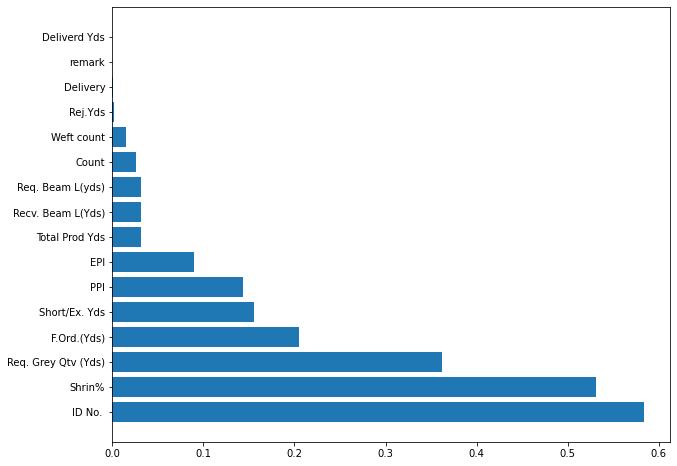

In [235]:
plt.figure(figsize=(10,8))
width = np.arange(len(mi_score))
plt.barh(width, mi_score)
ticks = list(mi_score.index)
plt.yticks(width,ticks);

In [238]:
df.head()

,Sl,ID No.,Count,Weft count,EPI,PPI,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%
0,1,12207-8,40,40,110,80,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974
1,2,12213-14-3,40,40,110,90,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973
2,3,12313-14-2,40,40,110,90,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488
3,4,12315-29-1,40,40,110,90,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,NaN,27820.0,401.0,14.011231
4,5,12317-2,50,50,140,70,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047


In [239]:
new_df= X

In [240]:
new_df['Total loss%']= y

In [243]:
new_df.head()

,ID No.,Count,Weft count,EPI,PPI,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%
0,0,40,40,110,80,0,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974
1,1,40,40,110,90,1,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973
2,2,40,40,110,90,1,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488
3,3,40,40,110,90,1,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,0.0,27820.0,401.0,14.011231
4,4,50,50,140,70,1,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047


In [255]:
df_cor= new_df.corr()['Total loss%'].sort_values(ascending= False)
df_cor

Total loss%            1.000000
Shrin%                 0.773019
ID No.                 0.117242
PPI                    0.105416
Delivery               0.029866
EPI                    0.021839
Rej.Yds                0.006197
Recv. Beam L(Yds)     -0.006057
Req. Beam L(yds)      -0.008287
Req. Grey Qtv (Yds)   -0.018729
Total Prod Yds        -0.020676
Deliverd Yds          -0.020917
F.Ord.(Yds)           -0.021866
remark                -0.023404
Weft count            -0.045971
Count                 -0.115921
Short/Ex. Yds         -0.145240
Name: Total loss%, dtype: float64

In [250]:
import seaborn as sns

<AxesSubplot:>

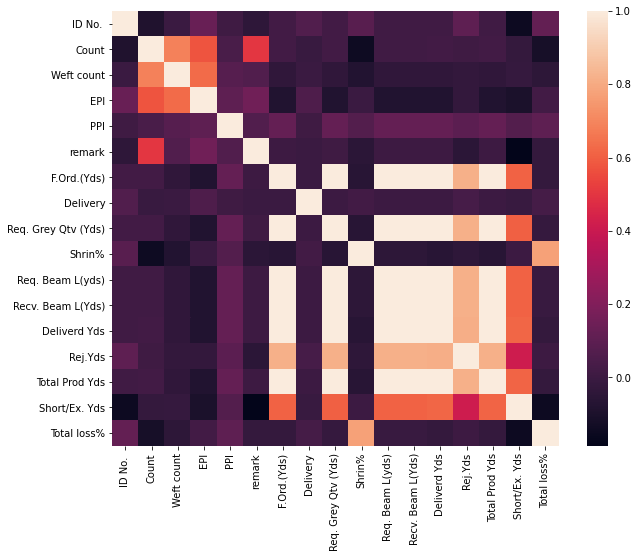

In [254]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr())

In [ ]:
new_df['ID No. ']

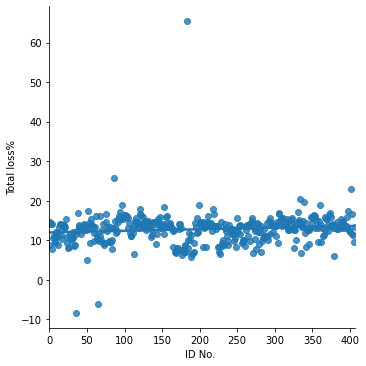

In [263]:
sns.lmplot(x='ID No. ', y= 'Total loss%',palette='red', data= new_df)

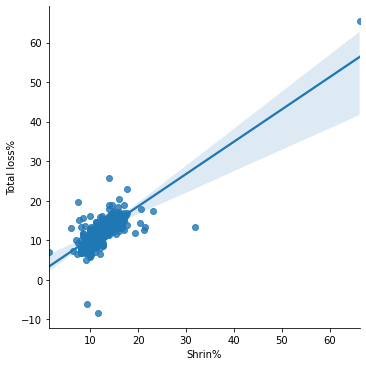

In [271]:
sns.lmplot(x='Shrin%', y= 'Total loss%', data= new_df)

In [272]:
X.columns

Index(['ID No. ', 'Count', 'Weft count', 'EPI', 'PPI', 'remark', 'F.Ord.(Yds)',
       'Delivery', 'Req. Grey Qtv (Yds)', 'Shrin%', 'Req. Beam L(yds)',
       'Recv. Beam L(Yds)', 'Deliverd Yds', 'Rej.Yds', 'Total Prod Yds',
       'Short/Ex. Yds', 'Total loss%'],
      dtype='object')

In [274]:
new_df['log_Req_Grey'] = new_df['Req. Grey Qtv (Yds)'].apply(np.log1p)

<AxesSubplot:xlabel='log_Req_Grey', ylabel='Density'>

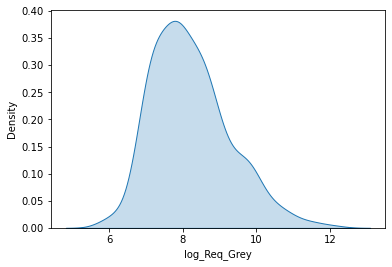

In [276]:
sns.kdeplot('log_Req_Grey',shade=True, data=new_df)

<AxesSubplot:xlabel='log_Req_Grey', ylabel='Count'>

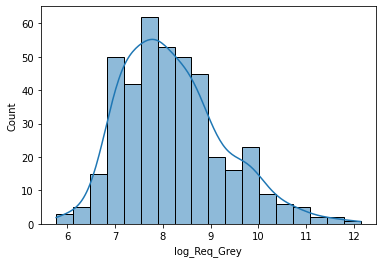

In [281]:
sns.histplot(new_df['log_Req_Grey'], kde=True)

# plot('F.Ord.(Yds)', data= new_df)

<AxesSubplot:xlabel='Count', ylabel='Total loss%'>

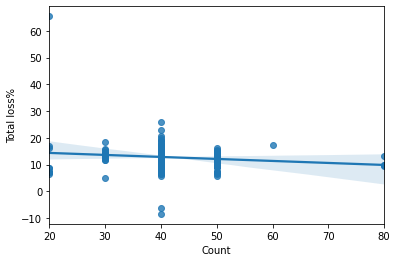

In [285]:
sns.regplot(x= 'Count', y= 'Total loss%', data= new_df)

<AxesSubplot:xlabel='Count', ylabel='Count'>

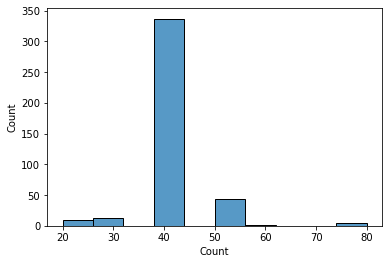

In [286]:
sns.histplot(new_df['Count'])

In [287]:
mi_score

ID No.                 0.583333
Shrin%                 0.530965
Req. Grey Qtv (Yds)    0.361953
F.Ord.(Yds)            0.205296
Short/Ex. Yds          0.155130
PPI                    0.143471
EPI                    0.089242
Total Prod Yds         0.031744
Recv. Beam L(Yds)      0.031273
Req. Beam L(yds)       0.031185
Count                  0.026189
Weft count             0.015381
Rej.Yds                0.002320
Delivery               0.000695
remark                 0.000000
Deliverd Yds           0.000000
dtype: float64

In [291]:
df.head()

,Sl,ID No.,Count,Weft count,EPI,PPI,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%
0,1,12207-8,40,40,110,80,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974
1,2,12213-14-3,40,40,110,90,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973
2,3,12313-14-2,40,40,110,90,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488
3,4,12315-29-1,40,40,110,90,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,NaN,27820.0,401.0,14.011231
4,5,12317-2,50,50,140,70,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047


In [306]:
df[df['PPI']==0]
# .value_counts()

,Sl,ID No.,Construction,Count,Weft count,EPI,PPI,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%,Unnamed: 19
114,115,13066-1,40x40/120x100,40,40,120,0,normal,3600,8.186687,3921,12.122402,4461.8880,4467.356,4157,22.0,4179.0,258.0,6.454735,NaN
117,118,13067-3,50x50/130x100,50,50,130,0,normal,2150,9.928781,2387,15.366447,2820.3944,2821.488,2419,NaN,2419.0,32.0,14.265097,NaN
126,127,13070-7,50x50/130x100,50,50,130,0,normal,3700,8.005967,4022,13.990610,4676.2336,4713.416,3979,52.0,4031.0,9.0,14.478162,NaN
127,128,13070-8,50x50/130x100,50,50,130,0,normal,3700,8.005967,4022,13.990610,4676.2336,4658.736,3960,50.0,4010.0,-12.0,13.925151,NaN
128,129,13070-9,50x50/130x100,50,50,130,0,normal,3700,8.005967,4022,13.990610,4676.2336,4658.736,3910,55.0,3965.0,-57.0,14.891078,NaN
188,189,13086-2,50x50/140x100,50,50,140,0,normal,2250,8.200734,2451,10.207466,2729.6256,2734.000,2429,31.0,2460.0,9.0,10.021946,NaN
356,359,13169-9,50x50/120x100,50,50,120,0,normal,1000,13.043478,1150,16.142521,1371.3744,1339.660,1139,26.0,1165.0,15.0,13.037636,NaN
357,360,13169-10,50x50/120x100,50,50,120,0,normal,1100,8.485857,1202,16.033448,1431.5224,1410.744,1198,NaN,1198.0,-4.0,15.080270,NaN
359,362,13169-13,40x40/120x100,40,40,120,0,normal,1100,9.465021,1215,12.518936,1388.8720,1361.532,1116,67.0,1183.0,-32.0,13.112582,NaN


In [346]:
df['warp_count']=df['Construction'].apply(lambda x: int(x[:2]))

df['weft_count']= df['Construction'].apply(lambda x: int(x.split('/')[0][-2:].replace('0x', '40')))
# df['weft_count'].replace('', 40)

df['epi']= df['Construction'].apply(lambda x: int(x.split('/')[-1].split('x')[0]))

df['ppi']= df['Construction'].apply(lambda x: int(x.split('/')[-1].split('x')[1]))

In [374]:
df['ppi'].value_counts()

80     178
90     110
70      76
64      11
100      9
76       6
88       5
50       3
96       3
94       1
44       1
84       1
48       1
72       1
62       1
60       1
106      1
Name: ppi, dtype: int64

In [380]:
for i in df[['epi', 'ppi', 'weft_count', 'warp_count']].columns:
    print(df[i].value_counts())

120    115
110    101
130     98
100     38
140     27
82      11
156      8
92       5
144      2
30       1
133      1
150      1
160      1
Name: epi, dtype: int64
80     178
90     110
70      76
64      11
100      9
76       6
88       5
50       3
96       3
94       1
44       1
84       1
48       1
72       1
62       1
60       1
106      1
Name: ppi, dtype: int64
40    321
50     52
30     16
20     12
60      4
80      4
Name: weft_count, dtype: int64
40    337
50     44
30     13
20     10
80      4
60      1
Name: warp_count, dtype: int64


In [338]:
df['warp_count'].value_counts()

40    337
50     44
30     13
20     10
80      4
60      1
Name: warp_count, dtype: int64

In [339]:
df['epi'].value_counts()

120    115
110    101
130     98
100     38
140     27
82      11
156      8
92       5
144      2
160      1
150      1
133      1
30       1
Name: epi, dtype: int64

In [345]:
df['epi'][0]

'110'

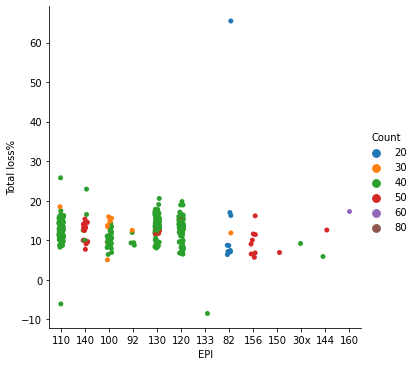

In [288]:
sns.catplot(x='EPI', y='Total loss%',col= , row=,  hue= 'Count', data= df)